## Teil 2

Matrikelnummern: 1679412

Folgende Regressionsarten werden verwendet um eine Vorhersage des SalePrices zu erstellen:
* Lineare Regression
* ???
* ???

In [401]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Perceptron, \
     PassiveAggressiveRegressor, SGDRegressor, HuberRegressor, Ridge
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor

E:\Programme\Python\Python36\lib\site-packages\sklearn\compose\_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)
E:\Programme\Python\Python36\lib\site-packages\sklearn\compose\_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)
E:\Programme\Python\Python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

               Regression Type        R2           MSE          RMSE          MAPE            MAX
0             LinearRegression  0.864231  6.991393e+08  26441.242658  12947.719678  147174.381756
1                        Lasso  0.864546  6.977314e+08  26414.606670  12937.201115  147193.164186
2           LogisticRegression  0.517602  1.393741e+09  37332.846631  17850.000000  183000.000000
3                   Perceptron  0.048510  2.777776e+09  52704.607376  23080.000000  230500.000000
4   PassiveAggressiveRegressor  0.843309  8.215820e+08  28663.251348  12133.981051  174726.375065
5                        Ridge  0.867382  6.859827e+08  26191.272073  12351.986606  147625.488134
6             BaggingRegressor  0.864617  6.909747e+08  26286.398221  11776.610000  136569.080000
7        RandomForestRegressor  0.871348  6.448371e+08  25393.643076  11829.133333  141788.720000
8                 SGDRegressor  0.853365  7.484049e+08  27356.989131  13730.305557  151710.262683
9               Hube

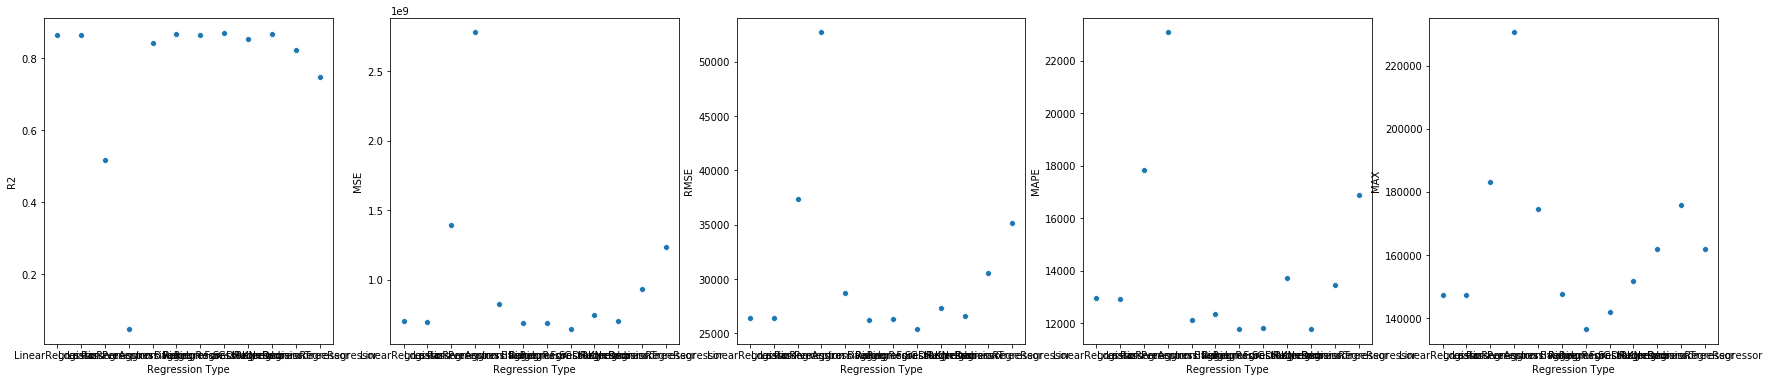

In [402]:
# gets dataFrame from file
def read_data(path):
    df = pd.read_csv(path, sep=";")
    return df

# scaling numerical values and turning objects into numerical values
def scale_and_convert_columns(df, model):
    categoricalCols = []
    for i in range(len(df.columns)):
        if (df.dtypes[i] == object):
            categoricalCols.append(i)
    numericalCols = []
    for i in range(len(df.columns)):
        if (df.dtypes[i] == 'int64' ):
            numericalCols.append(i)        
            
    preprocessor = make_column_transformer((categoricalCols, OneHotEncoder(handle_unknown='ignore')),
                                            (numericalCols, RobustScaler()))
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
    return pipe

# calculates R2, MSE, RMSE, MAPE and MAX* for the given regression model
def  calc_regression(path, model):
    df = read_data(path)
    pipe = scale_and_convert_columns(df.drop('SalePrice', axis=1), model)
    
    x = df.drop('SalePrice', axis=1).values #dimensions
    y = df['SalePrice'].values #prediction
    
    # neg_root_mean_squared_error somehow doesn't work
    scores = cross_validate(pipe, x,y, cv=5, scoring=['r2', 'neg_mean_squared_error', 
                                                      'neg_median_absolute_error', 'max_error' ])
    return {'Regression Type': type(model).__name__,'R2': scores['test_r2'].mean(), 'MSE': scores['test_neg_mean_squared_error'].mean()*-1, 
            'RMSE' : np.sqrt(scores['test_neg_mean_squared_error'].mean()*-1),'MAPE': scores['test_neg_median_absolute_error'].mean()*-1, 
            'MAX': scores['test_max_error'].mean()*-1}

#calculate the score for each model
path = 'SetFiltered.csv'
regressionTypes = [LinearRegression(), Lasso(), 
                   LogisticRegression(),Perceptron(),PassiveAggressiveRegressor(),
                   Ridge(), BaggingRegressor(),RandomForestRegressor(),
                   SGDRegressor(),HuberRegressor(),KNeighborsRegressor(),
                   DecisionTreeRegressor()]
results = []
for r in regressionTypes:
    results.append(calc_regression(path, r))

df = pd.DataFrame(data=results, columns=['Regression Type', 'R2', 'MSE', 'RMSE', 'MAPE', 'MAX'])
#df.head()
print(df.to_string()) # remove and use df.head() again when regression models are chosen

columns = df.columns
fx, axes = plt.subplots(1, len(columns)-1, sharey=False, figsize=(30,6))
for i in range(1, len(columns)):
    # could also use barplot instead of scatterplot
    sns.scatterplot(x=df.columns[0], y=df.columns[i], data=df, ax=axes[i-1])
